In [1]:
import pandas as pd


In [2]:
df_fname = 'val_evals.csv.gz'
loss_prefix = {
    'rank': 'rnk',
    'balanced_focal_bce': 'bfbce',
    'balanced_focal_softmax_bce': 'bfsmbce'
}
model_suffix = {
    'GRU': 'dx_gru',
    'RETAIN': 'dx_retain'
}
hyperparam_folders = ['loss_comparison_E150B128', 'loss_comparison_E150B32']



In [3]:
import seaborn as sns


code_auc_dfs = []
top15_dfs = []
metric1 = 'CodeAUC.mean(auc)'
metric2 = 'Top15Acc'

for hp_folder in hyperparam_folders:
    hp = hp_folder.split('_')[-1]
    model_evals = {}
    for modelname, suffix in model_suffix.items():
        model_evals[modelname] = {}
        for lossname, prefix in loss_prefix.items():
            evalfile = f'{hp_folder}/{prefix}_{suffix}/{df_fname}'
            model_evals[modelname][lossname] = pd.read_csv(evalfile, index_col=0)
    
    columns = list(list(model_evals.values())[0].values())[0].columns


    # metric = 'AdmissionAUC.mean(auc)'

    for modelname, modelevals in model_evals.items():
        vals = []
        loss = []
        eval_step = []

        for loss_k, df in modelevals.items():
            eval_step.extend(range(len(df)))
            vals.extend(df[metric1].values)
            loss.extend([loss_k] * len(df))

        df = pd.DataFrame({metric1: vals, 'loss': loss, 'eval_step': eval_step, 
                           'hp': hp, 'model': modelname})
        code_auc_dfs.append(df)
        

        
    top15cols = [c for c in columns if 'k15' in c]
    for modelname, modelevals in model_evals.items():
        vals = []
        loss = []
        eval_step = []
        group_ = []

        for group in top15cols:
            for loss_k, df in modelevals.items():
                eval_step.extend(range(len(df)))
                vals.extend(df[group].values)
                loss.extend([loss_k] * len(df))
                group_.extend([group] * len(df))

        df = pd.DataFrame({metric2: vals, 'loss': loss, 'eval_step': 
                           eval_step, 'group': group_,
                          'hp': hp, 'model': modelname})
        top15_dfs.append(df)
        
        
code_auc_df = pd.concat(code_auc_dfs)
top15_df = pd.concat(top15_dfs)
        

In [4]:
code_auc_df

,CodeAUC.mean(auc),loss,eval_step,hp,model
0,0.523478,rank,0,E150B128,GRU
1,0.539611,rank,1,E150B128,GRU
2,0.568145,rank,2,E150B128,GRU
3,0.584732,rank,3,E150B128,GRU
4,0.603209,rank,4,E150B128,GRU
...,...,...,...,...,...
289,0.672356,balanced_focal_softmax_bce,93,E150B32,RETAIN
290,0.671326,balanced_focal_softmax_bce,94,E150B32,RETAIN
291,0.669285,balanced_focal_softmax_bce,95,E150B32,RETAIN
292,0.670854,balanced_focal_softmax_bce,96,E150B32,RETAIN


/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


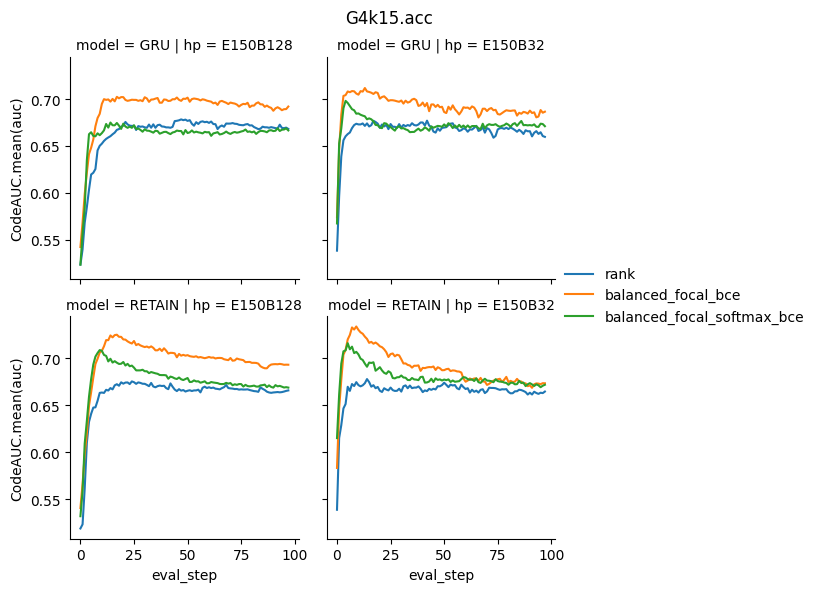

In [12]:
g = sns.FacetGrid(code_auc_df, col="hp",  row="model")
g.map(sns.lineplot, 'eval_step', metric1, 'loss')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(group)
fig = g.fig.get_figure()
fig.savefig(f"{metric1}_top15acc.pdf") 

/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


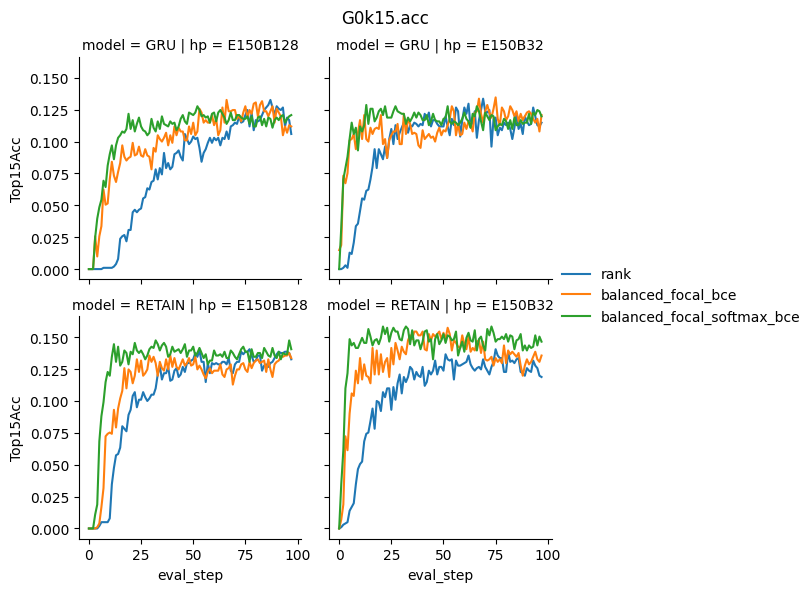

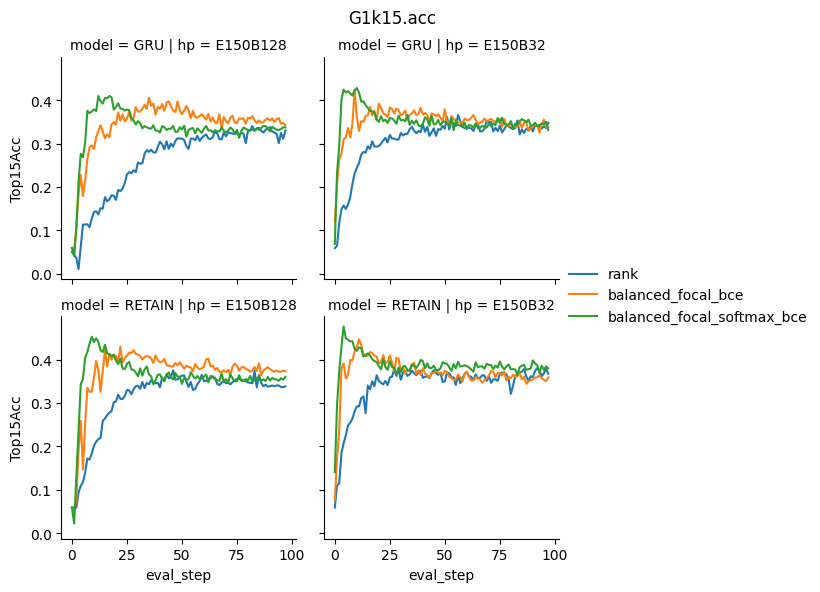

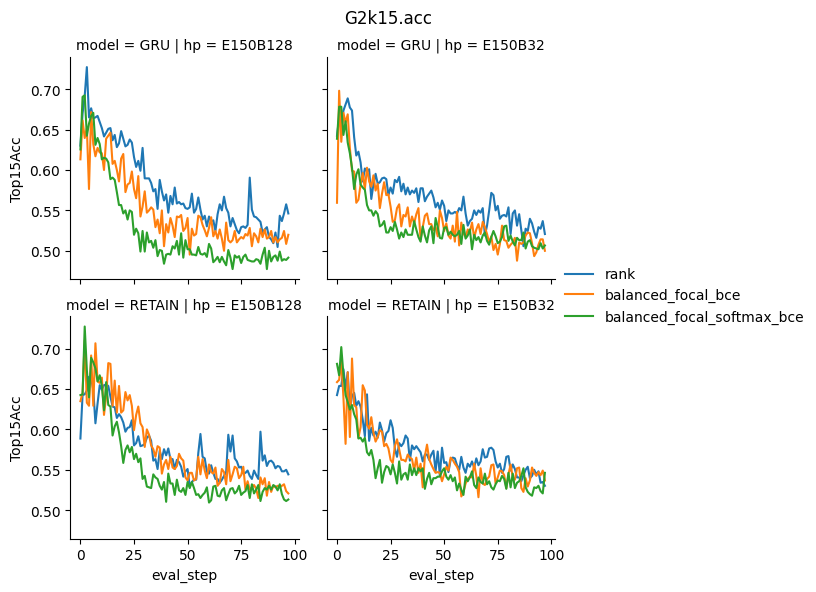

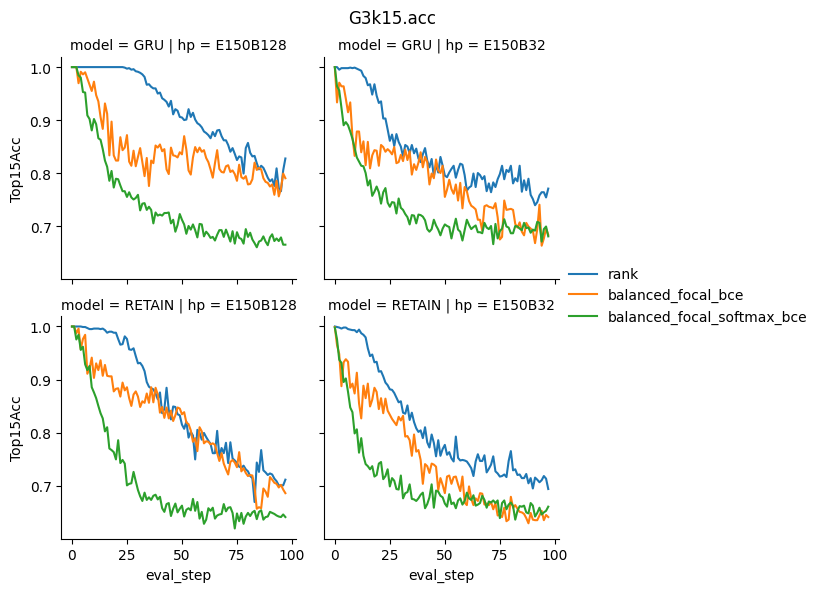

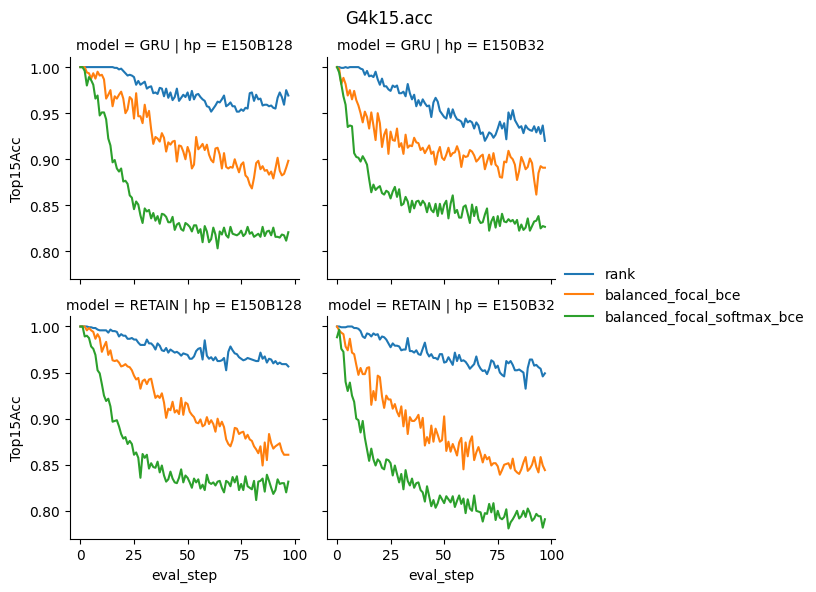

In [13]:
for group, group_df in top15_df.groupby('group'):
    g = sns.FacetGrid(group_df, col="hp",  row="model")
    g.map(sns.lineplot, 'eval_step',  metric2,  'loss')
    g.add_legend()
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(group)
    fig = g.fig.get_figure()
    fig.savefig(f"{group}_top15acc.pdf") 